<a href="https://colab.research.google.com/github/Kesavika-abi/Data_Science/blob/main/Random_forest_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


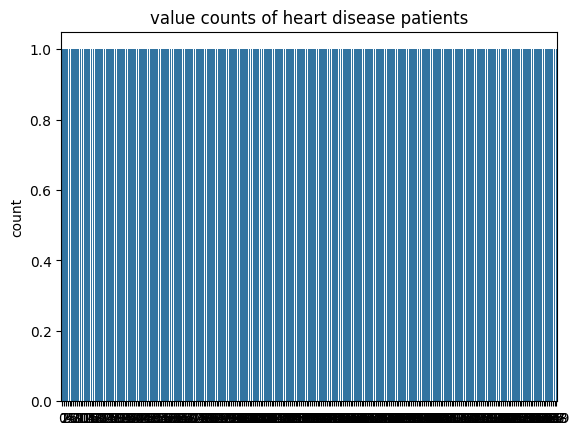

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('value counts of heart disease patients')
plt.show()

In [4]:
X=df.drop('heart disease',axis=1)

y=df['heart disease']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [9]:
import time
from sklearn.ensemble import RandomForestClassifier

classifier_rf=RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)
start_time=time.time()
classifier_rf.fit(X_train,y_train)
end_time=time.time()
print(f"Training completed in {end_time - start_time:.4f} seconds")

Training completed in 0.2927 seconds


In [10]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred=classifier_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[36 13]
 [15 17]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.57      0.53      0.55        32

    accuracy                           0.65        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.65      0.65      0.65        81



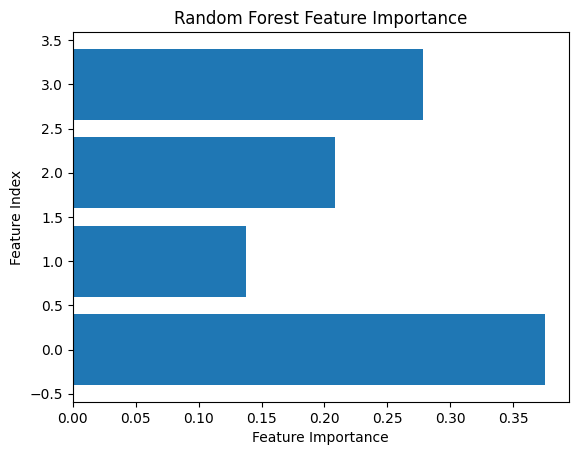

In [14]:

import matplotlib.pyplot as plt

importances=classifier_rf.feature_importances_
plt.barh(range(len(importances)),importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest Feature Importance')
plt.show()